___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [9]:
# !pip install pyforest
# !pip install ipython
# !pip install pyclustertend

# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 2-Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# 3-Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# 4-Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# 5-Figure&Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

#### Load Dataset

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = data.copy()


In [10]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

In [11]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [12]:
# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.shape


(200, 5)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
first_looking(df)

Shape:(200, 5)
There is 200 observation and 5 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
----------------------------------------------------------

In [14]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 200 observation and 5 columns in the dataset


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [17]:
df.drop(['customerid'],axis=1,inplace=True) 

In [18]:
df.head()

,gender,age,annual_income_(k$),spending_score_(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,annual_income_(k$),spending_score_(1-100),gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [21]:
missing(df)

,Missing_Number,Missing_Percent
age,0,0.000
annual_income_(k$),0,0.000
spending_score_(1-100),0,0.000
gender_Male,0,0.000


<AxesSubplot:xlabel='annual_income_(k$)', ylabel='spending_score_(1-100)'>

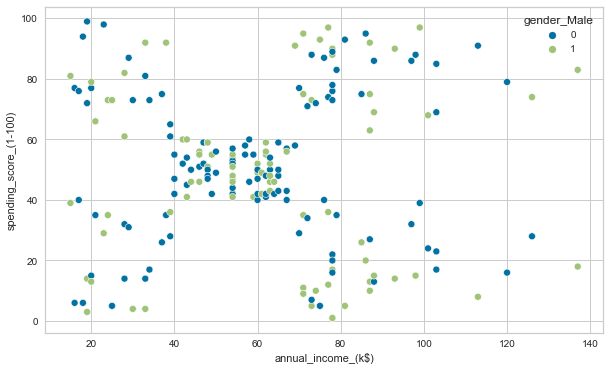

In [20]:
#Relation between Annual Income and Spending Score
sns.scatterplot(data = df, x = "annual_income_(k$)", y = "spending_score_(1-100)", hue = "gender_Male")


<AxesSubplot:xlabel='annual_income_(k$)', ylabel='age'>

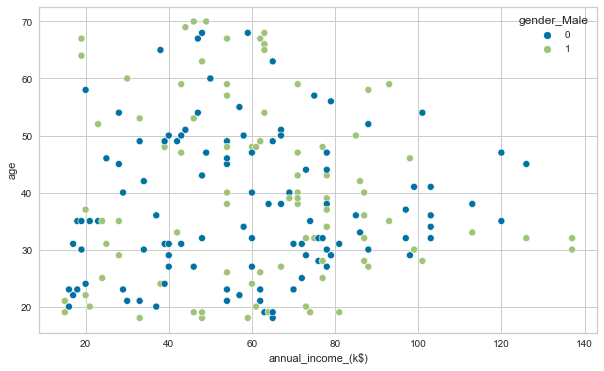

In [22]:
#Relation between Annual Income and Age
sns.scatterplot(data = df, x = "annual_income_(k$)", y = "age", hue = "gender_Male")


<AxesSubplot:>

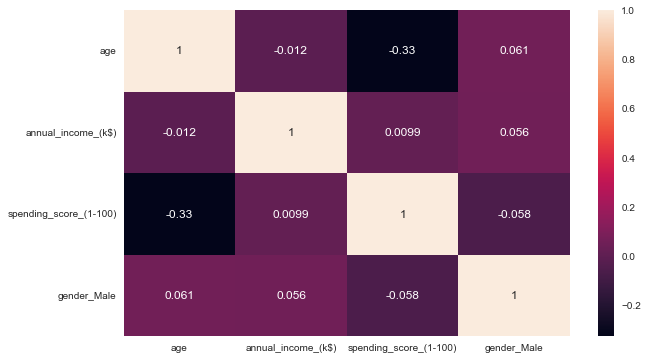

In [23]:
sns.heatmap(df.corr(),annot=True)


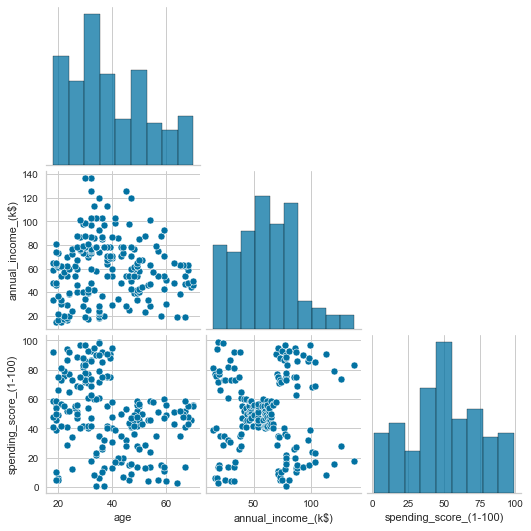

In [24]:
sns.pairplot(df.drop("gender_Male",axis=1),corner=True);


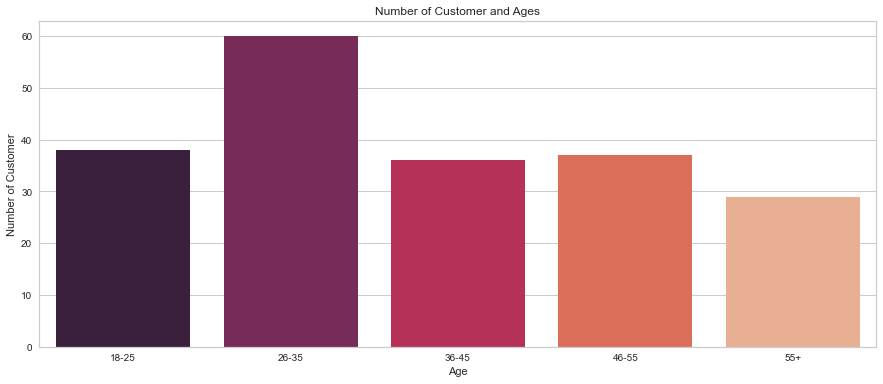

In [73]:
age18_25 = df.age[(df.age <= 25) & (df.age >= 18)]
age26_35 = df.age[(df.age <= 35) & (df.age >= 26)]
age36_45 = df.age[(df.age <= 45) & (df.age >= 36)]
age46_55 = df.age[(df.age <= 55) & (df.age >= 46)]
age55above = df.age[df.age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

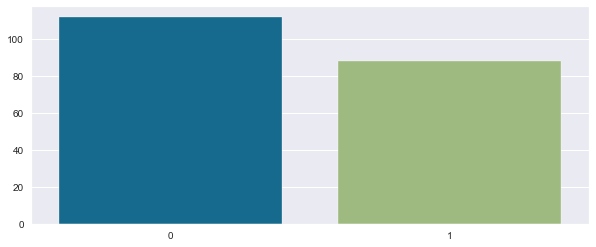

In [74]:
genders = df.gender_Male.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

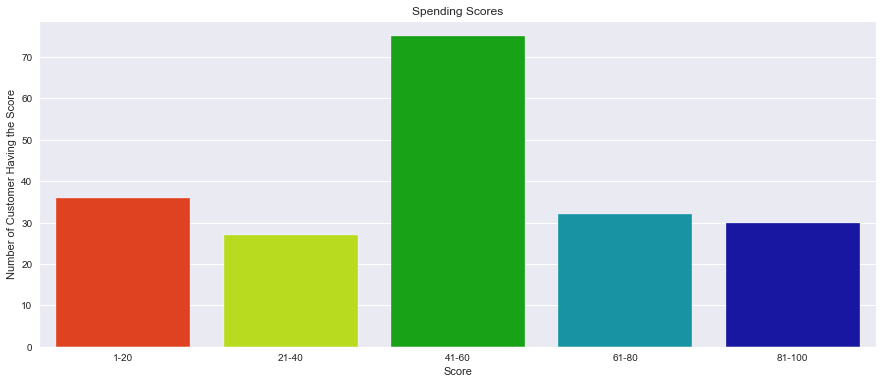

In [75]:

ss1_20 = df["spending_score_(1-100)"][(df["spending_score_(1-100)"] >= 1) & (df["spending_score_(1-100)"] <= 20)]
ss21_40 = df["spending_score_(1-100)"][(df["spending_score_(1-100)"] >= 21) & (df["spending_score_(1-100)"] <= 40)]
ss41_60 = df["spending_score_(1-100)"][(df["spending_score_(1-100)"] >= 41) & (df["spending_score_(1-100)"] <= 60)]
ss61_80 = df["spending_score_(1-100)"][(df["spending_score_(1-100)"] >= 61) & (df["spending_score_(1-100)"] <= 80)]
ss81_100 = df["spending_score_(1-100)"][(df["spending_score_(1-100)"] >= 81) & (df["spending_score_(1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

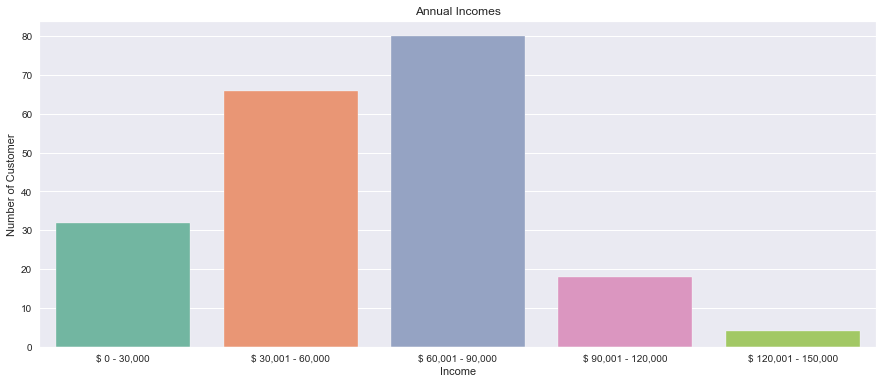

In [76]:
ai0_30 = df["annual_income_(k$)"][(df["annual_income_(k$)"] >= 0) & (df["annual_income_(k$)"] <= 30)]
ai31_60 = df["annual_income_(k$)"][(df["annual_income_(k$)"] >= 31) & (df["annual_income_(k$)"] <= 60)]
ai61_90 = df["annual_income_(k$)"][(df["annual_income_(k$)"] >= 61) & (df["annual_income_(k$)"] <= 90)]
ai91_120 = df["annual_income_(k$)"][(df["annual_income_(k$)"] >= 91) & (df["annual_income_(k$)"] <= 120)]
ai121_150 = df["annual_income_(k$)"][(df["annual_income_(k$)"] >= 121) & (df["annual_income_(k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [26]:
df1 = df[['age',"spending_score_(1-100)"]]


In [50]:
scaled = StandardScaler()


In [51]:
scaled_df1 = scaled.fit_transform(df1)


In [52]:
hopkins(scaled_df1,scaled_df1.shape[0])


0.305420089797499

#### *ii. Determine optimal number of clusters*

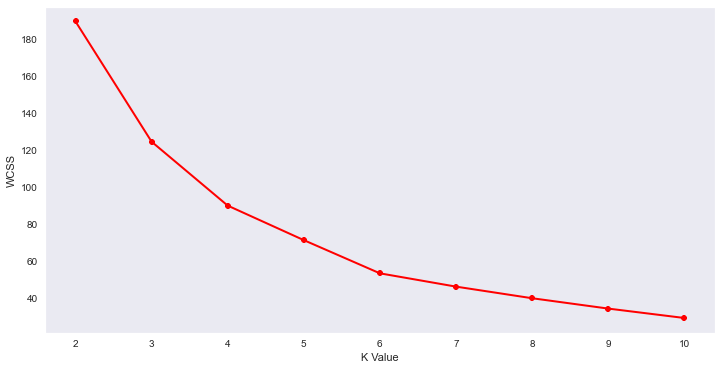

In [82]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(scaled_df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("WCSS")
plt.show()

The optimal K value is found to be 4 using the elbow method.

In [83]:
wcss

[189.3874903399244,
 124.33553836009898,
 89.76521676586151,
 71.0936414145941,
 53.12843835629399,
 45.93464331722907,
 39.65431493049888,
 34.05552348065695,
 28.970365676517652]

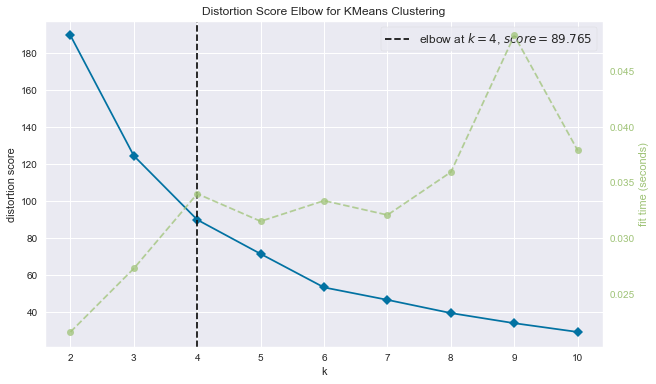

In [84]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(scaled_df1)        # Fit the data to the visualizer
visualizer.show();

In [85]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433
For n_clusters=9, the silhouette score is 0.4230225675027671
For n_clusters=10, the silhouette score is 0.441896169330358


### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [109]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_


In [110]:
labels = kmeans.fit_predict(scaled_df1)
df1["label"] = labels
df1.head()

,age,spending_score_(1-100),label
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0


#### *iv. Visualizing and Labeling All the Clusters*

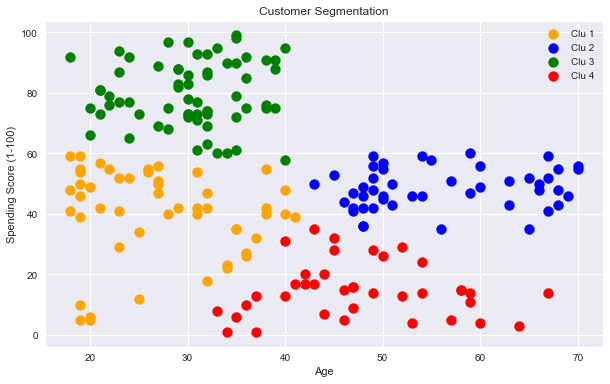

In [112]:
plt.scatter(df1.age[df1.label == 0], df1['spending_score_(1-100)'][df1.label == 0], s = 100, c = 'orange', label = 'Clu 1')
plt.scatter(df1.age[df1.label == 1], df1['spending_score_(1-100)'][df1.label == 1], s = 100, c = 'blue', label = 'Clu 2')
plt.scatter(df1.age[df1.label == 2], df1['spending_score_(1-100)'][df1.label == 2], s = 100, c = 'green', label = 'Clu 3')
plt.scatter(df1.age[df1.label == 3], df1['spending_score_(1-100)'][df1.label == 3], s = 100, c = 'red', label = 'Clu 4')

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [127]:
df2 = df[['annual_income_(k$)','spending_score_(1-100)']]


#### *ii. Determine optimal number of clusters*

In [128]:
scaled_df2 = scaled.fit_transform(df2)


In [129]:
hopkins(scaled_df2,scaled_df2.shape[0])


0.30678950279642697

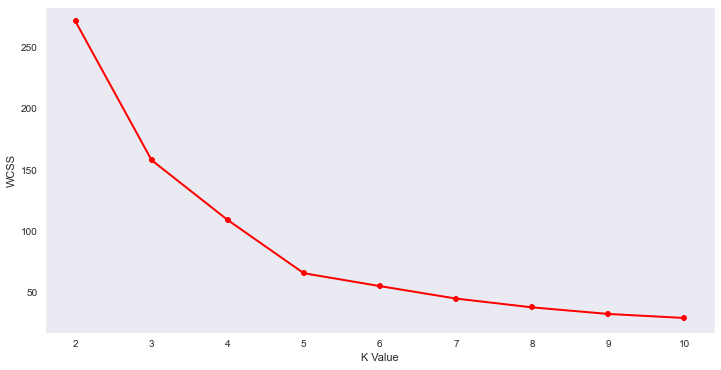

In [130]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("WCSS")
plt.show()

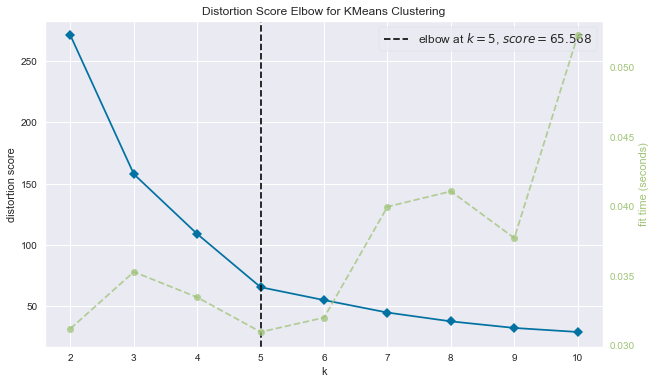

In [131]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(scaled_df2)       
visualizer.show();

In [132]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706
For n_clusters=9, the silhouette score is 0.45532159949822093
For n_clusters=10, the silhouette score is 0.4476280825932578


#### *iii. Apply K Means*

In [133]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df2)
cluster_labels = kmeans.labels_

In [135]:
labels = kmeans.fit_predict(scaled_df2)
df2["label"] = labels
df2.head()

,annual_income_(k$),spending_score_(1-100),label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


#### *iv. Visualizing and Labeling All the Clusters*

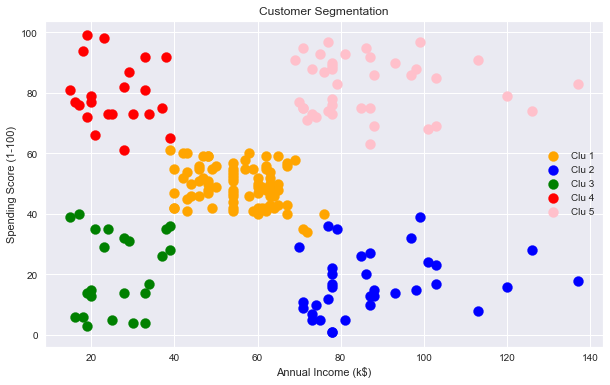

In [137]:
plt.scatter(df2['annual_income_(k$)'][df2.label == 0], df2['spending_score_(1-100)'][df2.label == 0], s = 100, c = 'orange', label = 'Clu 1')
plt.scatter(df2['annual_income_(k$)'][df2.label == 1], df2['spending_score_(1-100)'][df1.label == 1], s = 100, c = 'blue', label = 'Clu 2')
plt.scatter(df2['annual_income_(k$)'][df2.label == 2], df2['spending_score_(1-100)'][df2.label == 2], s = 100, c = 'green', label = 'Clu 3')
plt.scatter(df2['annual_income_(k$)'][df2.label == 3], df2['spending_score_(1-100)'][df2.label == 3], s = 100, c = 'red', label = 'Clu 4')
plt.scatter(df2['annual_income_(k$)'][df2.label == 4], df2['spending_score_(1-100)'][df2.label == 4], s = 100, c = 'pink', label = 'Clu 5')


plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [140]:
x1 = linkage(y = scaled_df1, method = "ward")
x1

array([[1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.20000000e+01, 1.76000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.54000000e+02, 1.94000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.59000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.47000000e+02, 1.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.60000000e+01, 2.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.83000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.20000000e+01, 1.46000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.43000000e+02, 1.81000000e+02, 3.88215607e-02, 2.00000000e+00],
       [1.29000000e+02, 1.53000000e+02, 3.88215607e-02, 2.00000000e+00],
       [1.48000000e+02, 1.90000000e+02, 3.88215607e-02, 2.00000000e+00],
       [6.00000000e+01, 7.00000000e+01, 3.88215607e-02, 2.00000000e+00],
       [5.80000000e+01, 9.70000000e+01, 3.88215607e-02, 2.00000000e+00],
       [3.80000000e+01, 1.68000000e+02, 3.88215607e

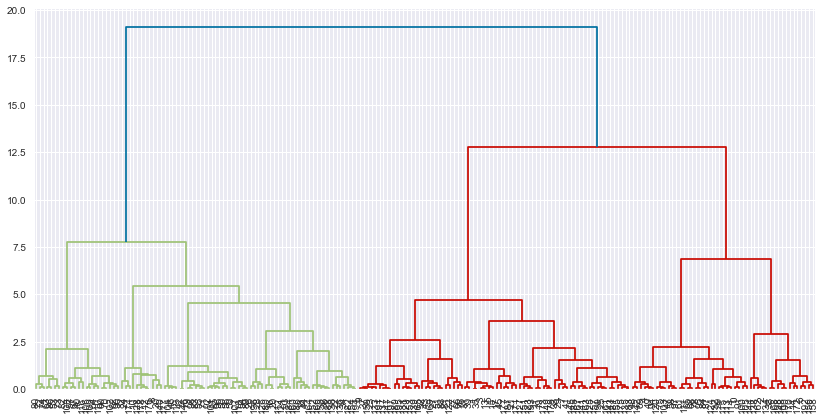

In [141]:
plt.figure(figsize = (14,7))
dendrogram(x1, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [144]:
x2 = linkage(y = scaled_df2, method = "ward")
x2

array([[6.50000000e+01, 6.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.56000000e+02, 1.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.29000000e+02, 1.31000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.70000000e+02, 1.74000000e+02, 3.81694292e-02, 2.00000000e+00],
       [5.10000000e+01, 5.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [9.20000000e+01, 9.90000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.01000000e+02, 1.09000000e+02, 3.81694292e-02, 2.00000000e+00],
       [9.40000000e+01, 9.80000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.07000000e+02, 1.13000000e+02, 3.81694292e-02, 2.00000000e+00],
       [2.10000000e+01, 2.30000000e+01, 3.81694292e-02, 2.00000000e+00],
       [1.50000000e+02, 1.54000000e+02, 3.88215607e-02, 2.00000000e+00],
       [1.51000000e+02, 1.55000000e+02, 3.88215607e-02, 2.00000000e+00],
       [6.00000000e+01, 6.10000000e+01, 3.88215607e

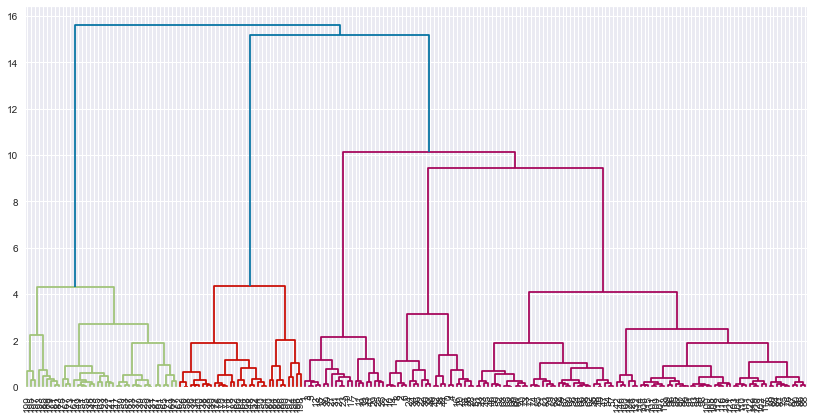

In [145]:
plt.figure(figsize = (14,7))
dendrogram(x2, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [146]:
from sklearn.cluster import AgglomerativeClustering


In [150]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.45636615390349894
Silhouette Score for 3 clusters: 0.44208234398605883
Silhouette Score for 4 clusters: 0.4603646025556219
Silhouette Score for 5 clusters: 0.4041435584004519
Silhouette Score for 6 clusters: 0.41271682775643476
Silhouette Score for 7 clusters: 0.415884430391867
Silhouette Score for 8 clusters: 0.387353953002565
Silhouette Score for 9 clusters: 0.3936238721347386
Silhouette Score for 10 clusters: 0.38599808909403066


In [151]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df1)

In [153]:
df1["label"] = clusters


In [154]:
df1.groupby("label").mean()


,age,spending_score_(1-100)
label,,
0,30.520,43.620
1,53.170,50.453
2,42.650,12.275
3,30.175,82.351


In [157]:
df1.label.value_counts()


3    57
1    53
0    50
2    40
Name: label, dtype: int64

#### Annual Income and Spending Score- x2

In [155]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36737734620684265
Silhouette Score for 3 clusters: 0.462308734038414
Silhouette Score for 4 clusters: 0.4924899099064366
Silhouette Score for 5 clusters: 0.5541332798644271
Silhouette Score for 6 clusters: 0.5390996397382017
Silhouette Score for 7 clusters: 0.520894822141792
Silhouette Score for 8 clusters: 0.43313054817610713
Silhouette Score for 9 clusters: 0.43944465774630276
Silhouette Score for 10 clusters: 0.4345958236001419


In [156]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model2.fit_predict(df2)
df2["label"] = clusters


In [158]:
df2.groupby("label").mean()


,annual_income_(k$),spending_score_(1-100)
label,,
0,89.406,15.594
1,55.812,49.129
2,86.538,82.128
3,25.095,80.048
4,26.304,20.913


In [159]:
df2.label.value_counts()


1    85
2    39
0    32
4    23
3    21
Name: label, dtype: int64

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

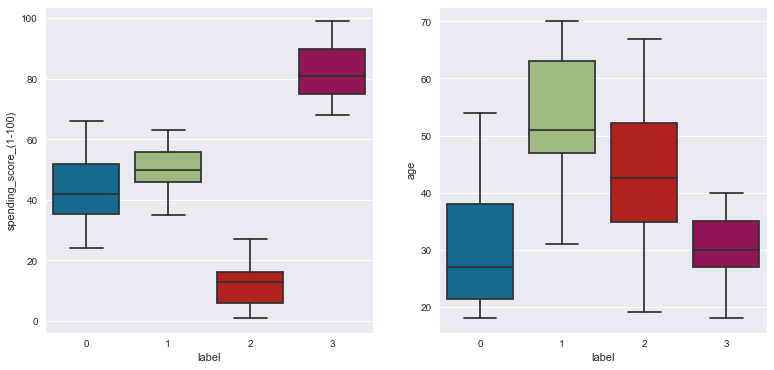

In [161]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "spending_score_(1-100)", x = "label", data = df1)

plt.subplot(132)
sns.boxplot(y = "age", x = "label", data = df1);

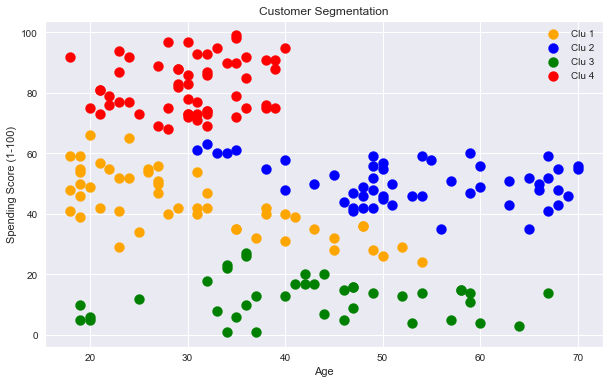

In [164]:
plt.scatter(df1['age'][df1.label == 0], df1['spending_score_(1-100)'][df1.label == 0], s = 100, c = 'orange', label = 'Clu 1')
plt.scatter(df1['age'][df1.label == 1], df1['spending_score_(1-100)'][df1.label == 1], s = 100, c = 'blue', label = 'Clu 2')
plt.scatter(df1['age'][df1.label == 2], df1['spending_score_(1-100)'][df1.label == 2], s = 100, c = 'green', label = 'Clu 3')
plt.scatter(df1['age'][df1.label == 3], df1['spending_score_(1-100)'][df1.label == 3], s = 100, c = 'red', label = 'Clu 4')


plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Annual Income and Spending Score- x2

<AxesSubplot:xlabel='label', ylabel='annual_income_(k$)'>

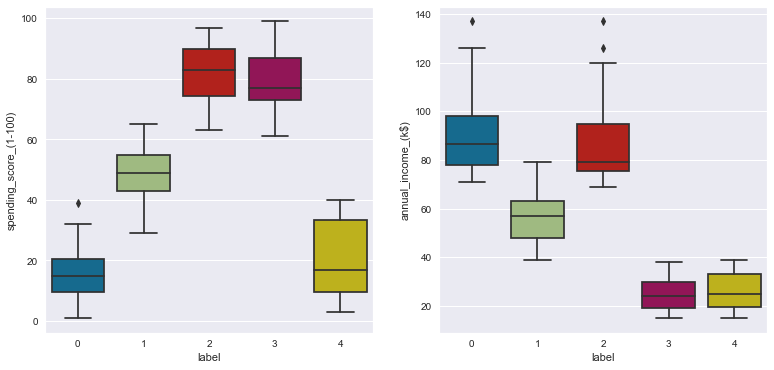

In [162]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "spending_score_(1-100)", x = "label", data = df2)

plt.subplot(132)
sns.boxplot(y = "annual_income_(k$)", x = "label", data = df2)


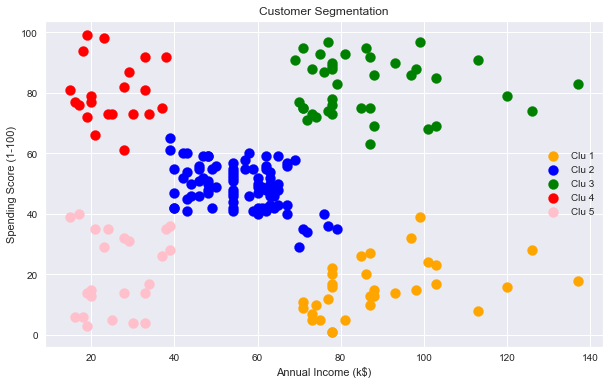

In [166]:
plt.scatter(df2['annual_income_(k$)'][df2.label == 0], df2['spending_score_(1-100)'][df2.label == 0], s = 100, c = 'orange', label = 'Clu 1')
plt.scatter(df2['annual_income_(k$)'][df2.label == 1], df2['spending_score_(1-100)'][df2.label == 1], s = 100, c = 'blue', label = 'Clu 2')
plt.scatter(df2['annual_income_(k$)'][df2.label == 2], df2['spending_score_(1-100)'][df2.label == 2], s = 100, c = 'green', label = 'Clu 3')
plt.scatter(df2['annual_income_(k$)'][df2.label == 3], df2['spending_score_(1-100)'][df2.label == 3], s = 100, c = 'red', label = 'Clu 4')
plt.scatter(df2['annual_income_(k$)'][df2.label == 4], df2['spending_score_(1-100)'][df2.label == 4], s = 100, c = 'pink', label = 'Clu 5')


plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Interpretation based on Age and Spending Score- x1

In [167]:
df1.groupby("label").mean()


,age,spending_score_(1-100)
label,,
0,30.520,43.620
1,53.170,50.453
2,42.650,12.275
3,30.175,82.351


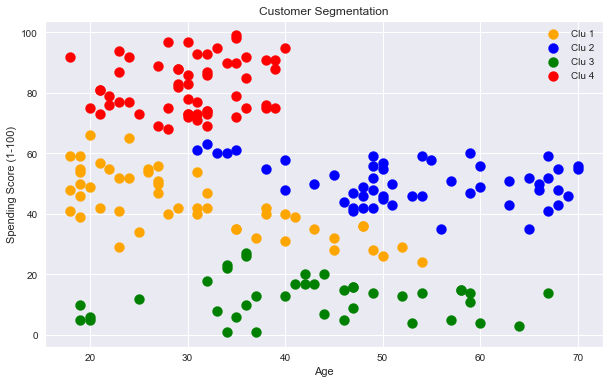

In [168]:
plt.scatter(df1['age'][df1.label == 0], df1['spending_score_(1-100)'][df1.label == 0], s = 100, c = 'orange', label = 'Clu 1')
plt.scatter(df1['age'][df1.label == 1], df1['spending_score_(1-100)'][df1.label == 1], s = 100, c = 'blue', label = 'Clu 2')
plt.scatter(df1['age'][df1.label == 2], df1['spending_score_(1-100)'][df1.label == 2], s = 100, c = 'green', label = 'Clu 3')
plt.scatter(df1['age'][df1.label == 3], df1['spending_score_(1-100)'][df1.label == 3], s = 100, c = 'red', label = 'Clu 4')


plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1: The average age is around 30.5,Spending scores are around average. It should be researched what can be done to increase spending.
Cluster 2: The average age is around 53, Spending score are on average.  

In [203]:
#Comparision
algorithms=["K-Means","Hierarchical Clustering"]

# Silhouette Score
ss=[metrics.silhouette_score(scaled_df1,df1.label),metrics.silhouette_score(df1,df1.label)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(scaled_df1,df1.label),metrics.davies_bouldin_score(df1,df1.label)]


In [204]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
1,Hierarchical Clustering,0.862,0.461
0,K-Means,0.949,0.380


In [205]:
#Comparision
algorithms=["K-Means","Hierarchical Clustering"]

# Silhouette Score
ss=[metrics.silhouette_score(scaled_df2,df2.label),metrics.silhouette_score(df2,df2.label)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(scaled_df2,df2.label),metrics.davies_bouldin_score(df2,df2.label)]


In [206]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,0.578,0.554
1,Hierarchical Clustering,0.577,0.554


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [178]:
df3 = df[['age','annual_income_(k$)','spending_score_(1-100)']]
scaled_df3 = scaled.fit_transform(df3)
hopkins(scaled_df3,scaled_df3.shape[0])

0.3170131461003969

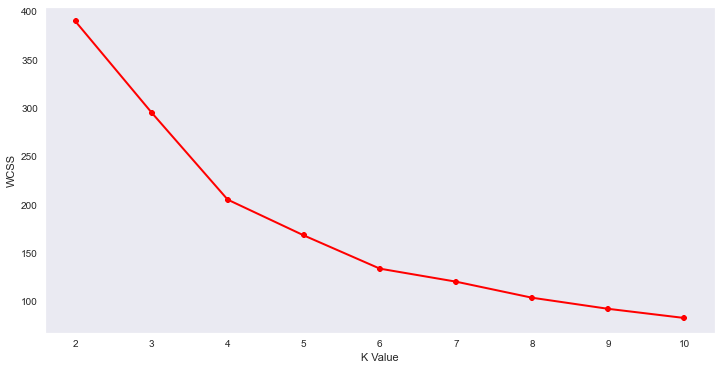

In [179]:
wcss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("WCSS")
plt.show()

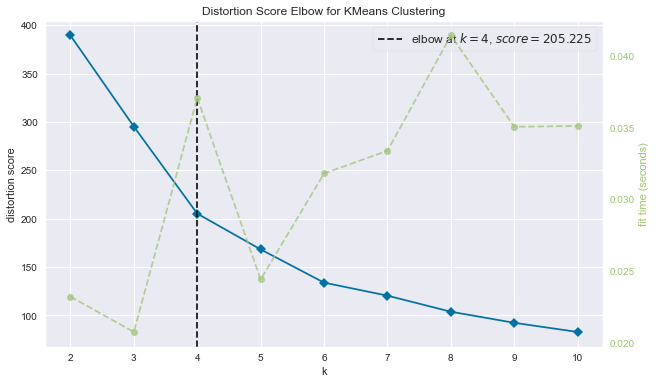

In [180]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(scaled_df3)
visualizer.show();

In [181]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.33547192894004574
For n_clusters=3, the silhouette score is 0.357793388710272
For n_clusters=4, the silhouette score is 0.4039582785148566
For n_clusters=5, the silhouette score is 0.41664341513732767
For n_clusters=6, the silhouette score is 0.4284167762892593
For n_clusters=7, the silhouette score is 0.4111545340123845
For n_clusters=8, the silhouette score is 0.408443059554235
For n_clusters=9, the silhouette score is 0.4200735068174298
For n_clusters=10, the silhouette score is 0.42261564078864017


The values of silhouette score are close to each other in range 4 to 6. In the circumstances, Let's look at the another metric. The metric is Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [198]:
from sklearn import metrics
for i in [4,5,6]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(scaled_df3)
    print('Davies Bouldin Score:',str(metrics.davies_bouldin_score(scaled_df3,kmeans_labels)))

Davies Bouldin Score: 0.9307956868103671
Davies Bouldin Score: 0.874551051002418
Davies Bouldin Score: 0.8238802468310342


In [199]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_df3)
cluster_labels = kmeans.labels_

In [200]:
labels = kmeans.fit_predict(scaled_df3)
df3["label"] = labels
df3.head()

,age,annual_income_(k$),spending_score_(1-100),label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


In [207]:
#Comparision
algorithms=["K-Means","Hierarchical Clustering"]

# Silhouette Score
ss=[metrics.silhouette_score(scaled_df3,df3.label),metrics.silhouette_score(df3,df3.label)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(scaled_df3,df3.label),metrics.davies_bouldin_score(df3,df3.label)]


In [208]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
1,Hierarchical Clustering,0.763,0.447
0,K-Means,0.825,0.428


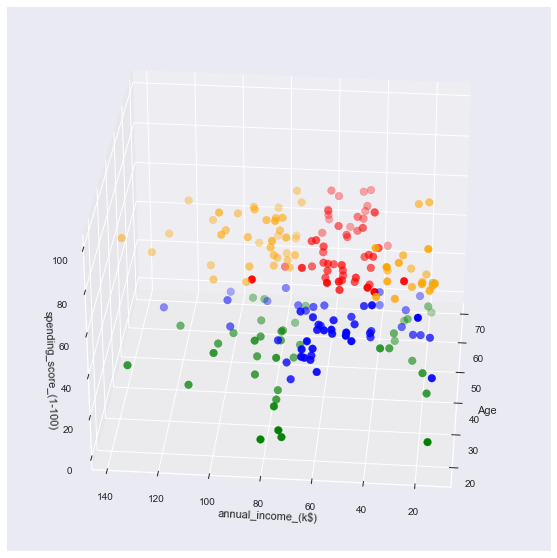

In [201]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.age[df.label == 0], df["annual_income_(k$)"][df.label == 0], df["spending_score_(1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.age[df.label == 1], df["annual_income_(k$)"][df.label == 1], df["spending_score_(1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.age[df.label == 2], df["annual_income_(k$)"][df.label == 2], df["spending_score_(1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.age[df.label == 3], df["annual_income_(k$)"][df.label == 3], df["spending_score_(1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.age[df.label == 4], df["annual_income_(k$)"][df.label == 4], df["spending_score_(1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.age[df.label == 5], df["annual_income_(k$)"][df.label == 5], df["spending_score_(1-100)"][df.label == 5], c='pink', s=60)
ax.view_init(30, 185)
ax.set_xlabel('Age')
ax.set_ylabel('annual_income_(k$)')
ax.set_zlabel('spending_score_(1-100)')
plt.show()

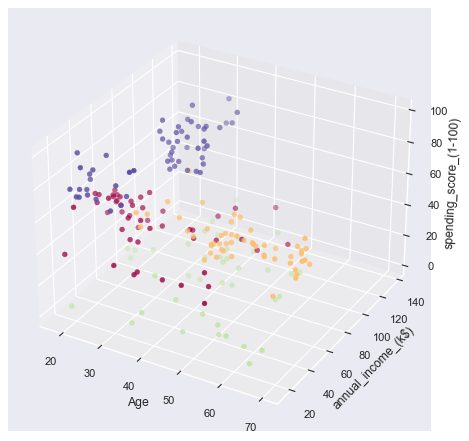

In [202]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(df.age,df["annual_income_(k$)"],df["spending_score_(1-100)"],c=df.label,cmap='Spectral')

xLabel = ax.set_xlabel('Age')
yLabel = ax.set_ylabel('annual_income_(k$)')
zLabel = ax.set_zlabel('spending_score_(1-100)')

In [219]:
fig = plt.figure(figsize=(30, 30), dpi=280, facecolor='w', edgecolor='k')
fig = px.scatter_3d(x=df.age,
                   y=df["annual_income_(k$)"],
                   z=df["spending_score_(1-100)"],
                   color=df.label,
                   
                   
        
                   labels = {"x": "Age",
                             "y": "annual_income_(k$)",
                             "z": "spending_score_(1-100)"},
                   hover_name=df["label"])
fig.update_traces(marker_size = 4)

fig.show()

<Figure size 8400x8400 with 0 Axes>

In [209]:
df.head()

,age,annual_income_(k$),spending_score_(1-100),gender_Male,label
0,19,15,39,1,0
1,21,15,81,1,3
2,20,16,6,0,2
3,23,16,77,0,3
4,31,17,40,0,0


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___